In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [15]:
df= pd.read_csv('GOOG.csv', date_parser=True)

/var/folders/5r/dmv946n139q8vvmj1hc60c000000gn/T/ipykernel_3473/3811533205.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df= pd.read_csv('GOOG.csv', date_parser=True)


In [16]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
5,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128600
6,2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241200
7,2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221400
8,2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941200
9,2004-09-01,51.158245,51.292744,49.648903,49.937820,49.937820,9181600


In [17]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1021092


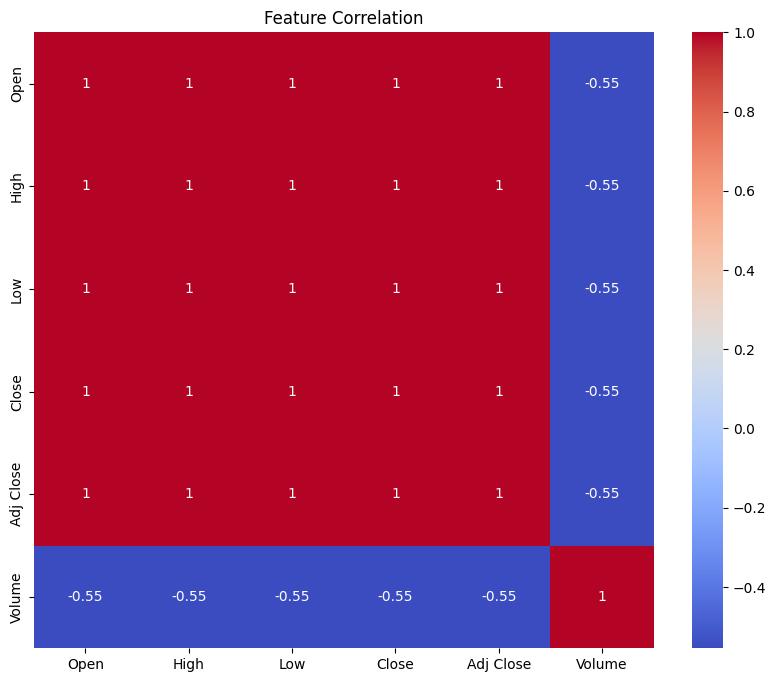

In [28]:
numeric_d= df.drop(columns=['Date'])
corr_m=numeric_d.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_m, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [31]:
from sklearn.preprocessing import MinMaxScaler
data_train=df[df['Date']<'2019-01-01'].copy()
data_test=df[df['Date']>'2019-01-01'].copy()
data_train=data_train.drop(['Date', 'Adj Close'], axis=1)

scaler= MinMaxScaler()
data_train = scaler.fit_transform(data_train)

In [32]:
x_train=[]
y_train=[]
for i in range(60, data_train.shape[0]):
    x_train.append(data_train[i-60:i])
    y_train.append(data_train[i, 0])
x_train,y_train= np.array(x_train), np.array(y_train)

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN

regressor= Sequential()
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))
regressor.summary()
regressor.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)       │ (None, 60, 50)         │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_13 (SimpleRNN)       │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_14 (SimpleRNN)       │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_15 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,001 (70.32 KB)

 Trainable params: 18,001 (70.32 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
regressor.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.2857
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 0.0807
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0396
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0175
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.0101
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0065
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0049
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.0036
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0036
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 0.0029
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0028
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0027
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.0025
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.0022
Epoch 15/50
356/356 ━━━━━━━━━

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
inputs=df.drop(columns=['Date', 'Adj Close'], axis=1)
inputs=scaler.transform(inputs)
scale= 1/8.1860e-04

x_test=[]
y_test=[]

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
    
x_test, y_test= np.array(x_test), np.array(y_test)
y_pred = regressor.predict(x_test)
y_pred= y_pred*scale
y_test= y_test*scale

mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse)
r2= r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print(f"R2:' {r2:.4f}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 
MAE: 12.344312857204775
MSE: 371.427209283456
RMSE: 19.27244689403647
R2:' 0.9965


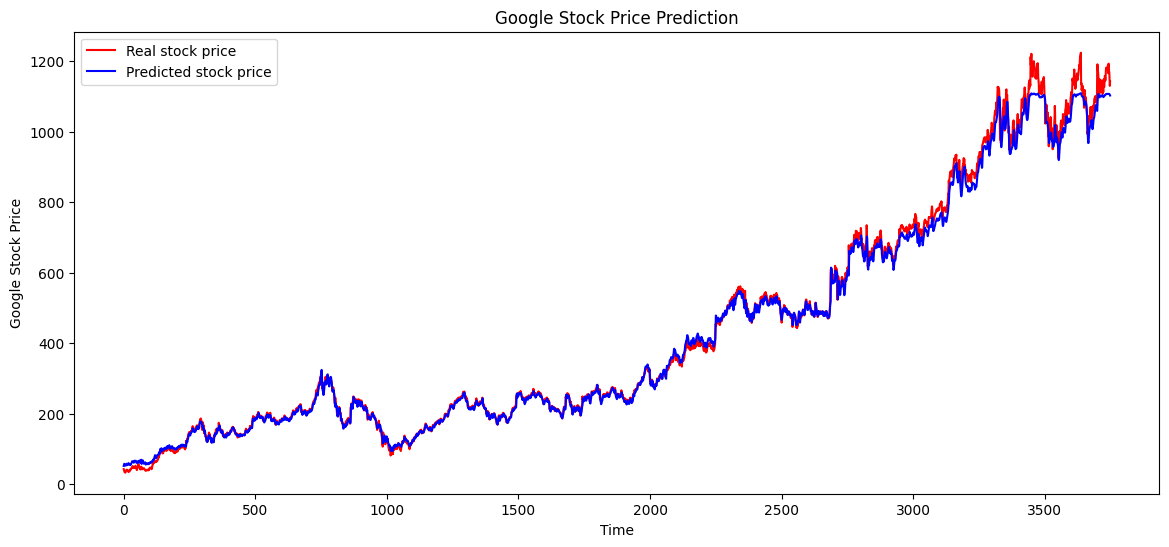

In [43]:
plt.figure(figsize=(14,6))
plt.title('Predicted vs Actual Stocks')
plt.plot(y_test, color='red', label='Real stock price')
plt.plot(y_pred, color='blue', label='Predicted stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()